#House Pirce Prediction

## Import Libraries

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load data

In [14]:
data_df = pd.read_csv("Housing.csv")
data_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Model features

y = price (R)
x1 = area of house (m^2)
x2 = number of bedrooms
x3 = number of bathrooms
x4 = number of stories (floors)
x5 = connected to mainroad (yes: 1, no: 0)
x6 = has guestroms (yes: 1, no: 0)
x7 = has basement (yes: 1, no: 0)
x8 = has hot water heating (yes: 1, no: 0)
x9 = has airconditioning (yes: 1, no: 0)
x10 = number of parking bays
x11 =  house in preferable area (yes: 1, no: 0)
x12 = furnishing status[ furnished: (1,0,0), semi furnished: (0,1,0), unfurnished: (0,0,1)]

## Data Wrangling


In [20]:
#Determining null values for every feature

# Price (Target variable)
count_price_null = data_df['price'].isnull().sum()
print(f"Price has {count_price_null} null vaues.")

print('-' * 50)

# Area
count_area_null = data_df['area'].isnull().sum()
print(f"Area has {count_area_null} null values.")

print('-' * 50)

# Bedrooms
count_bedrooms_null = data_df['bedrooms'].isnull().sum()
print(f"Bedrooms has {count_bedrooms_null} null values.")

print('-' * 50)

# Bathrooms
count_bathrooms_null = data_df['bathrooms'].isnull().sum()
print(f"Bathrooms has {count_bathrooms_null} null values.")

print('-' * 50)

# Stories
count_stories_null = data_df['stories'].isnull().sum()
print(f"Stories has {count_stories_null} null values.")

print('-' * 50)

# Mainroad
count_distinct_mainroad = data_df['mainroad'].nunique()
count_mainroad_null = data_df['mainroad'].isnull().sum()
print(f"Mainroad has {count_distinct_mainroad} distinct values. The values are {data_df['mainroad'].unique()}")
print(f"Mainroad has {count_mainroad_null} null values.")

print('-' * 50)

# Guestroom
count_distinct_guestroom = data_df['guestroom'].nunique()
count_guestroom_null = data_df['guestroom'].isnull().sum()
print(f"Guestroom has {count_distinct_guestroom} distinct values. The values are {data_df['guestroom'].unique()}")
print(f"Guestroom has {count_guestroom_null} null values.")

print('-' * 50)

# Basement
count_distinct_basement = data_df['basement'].nunique()
count_basement_null = data_df['basement'].isnull().sum()
print(f"Basement has {count_distinct_basement} distinct values. The values are {data_df['basement'].unique()}")
print(f"Basement has {count_basement_null} null values.")

print('-' * 50)

# Hotwater heating
count_distinct_hotwaterheating = data_df['hotwaterheating'].nunique()
count_hotwaterheating_null = data_df['hotwaterheating'].isnull().sum()
print(f"Hot water heating has {count_distinct_hotwaterheating} distinct values. The values are {data_df['hotwaterheating'].unique()}")
print(f"Hot water heating has {count_hotwaterheating_null} null values.")

print('-' * 50)

# Airconditioning
count_distinct_airconditioning = data_df['airconditioning'].nunique()
count_airconditioning_null = data_df['airconditioning'].isnull().sum()
print(f"Air condictioning has {count_distinct_airconditioning} distinct values. The values are {data_df['airconditioning'].unique()}")
print(f"Air conditioning has {count_airconditioning_null} null values.")

print('-' * 50)

# Parking
count_parking_null = data_df['parking'].isnull().sum()
print(f"Parking has {count_parking_null} null values.")

print('-' * 50)

# Prefarea
count_distinct_prefarea = data_df['prefarea'].nunique()
count_prefarea_null = data_df['prefarea'].isnull().sum()
print(f"Prefarea has {count_distinct_prefarea} distinct values. The values are {data_df['prefarea'].unique()}")
print(f"Prefarea has {count_prefarea_null} null values.")

print('-' * 50)

# Furnishing status
count_distinct_furnishstatus = data_df['furnishingstatus'].nunique()
count_furnishtatus_null = data_df['furnishingstatus'].isnull().sum()
print(f"Furnishing status has {count_distinct_furnishstatus} distinct values. The values are {data_df['furnishingstatus'].unique()}")
print(f"Furnishing status has {count_furnishtatus_null} null values.")

Price has 0 null vaues.
--------------------------------------------------
Area has 0 null values.
--------------------------------------------------
Bedrooms has 0 null values.
--------------------------------------------------
Bathrooms has 0 null values.
--------------------------------------------------
Stories has 0 null values.
--------------------------------------------------
Mainroad has 2 distinct values. The values are ['yes' 'no']
Mainroad has 0 null values.
--------------------------------------------------
Guestroom has 2 distinct values. The values are ['no' 'yes']
Guestroom has 0 null values.
--------------------------------------------------
Basement has 2 distinct values. The values are ['no' 'yes']
Basement has 0 null values.
--------------------------------------------------
Hot water heating has 2 distinct values. The values are ['no' 'yes']
Hot water heating has 0 null values.
--------------------------------------------------
Air condictioning has 2 distinct valu

In [ ]:
# Encoding the following features (mainroad, guestroom, basement, hotwaterheating, airconditioning and prefarea) into yes = 1 and no = 0
data_df= data_df.replace({'yes':1,'no':0})
data_df.head()


C:\Users\Boitshoko Choabi\AppData\Local\Temp\ipykernel_19144\101081849.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df= data_df.replace({'yes':1,'no':0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#Encoding furnishingstatus into furnished=1 and no=0
encoding_furnishingstatus_df = pd.get_dummies(data_df['furnishingstatus']).astype(int)
encoding_furnishingstatus_df.head()

house_data_df = pd.concat([data_df,encoding_furnishingstatus_df],axis = 1)
house_data_df.drop(columns ='furnishingstatus',inplace=True)
house_data_df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


## Partition dataset

In [ ]:
y = house_data_df['price']
X = house_data_df.drop(columns = 'price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Linear Regression

In [52]:
# This function will calculate the average price for each aggregated value in a specific column 

def calculate_avg_price (df, group_col: str, price_col: str) -> pd.DataFrame:

    # Group the DataFrame by the specified column and calculate the mean of the price column
    avg_prices = df.groupby(group_col)[price_col].mean().reset_index() 

    #Rename the price column to reflect that it now contains the average price
    avg_prices.rename(columns = {price_col: f'average_{price_col}'}, inplace = True)

    return avg_prices


C:\Users\Boitshoko Choabi\AppData\Local\Temp\ipykernel_19144\4074621684.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,0].legend()
C:\Users\Boitshoko Choabi\AppData\Local\Temp\ipykernel_19144\4074621684.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,1].legend()
C:\Users\Boitshoko Choabi\AppData\Local\Temp\ipykernel_19144\4074621684.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,2].legend()
C:\Users\Boitshoko Choabi\AppData\Local\Temp\ipykernel_19144\4074621684.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an unders

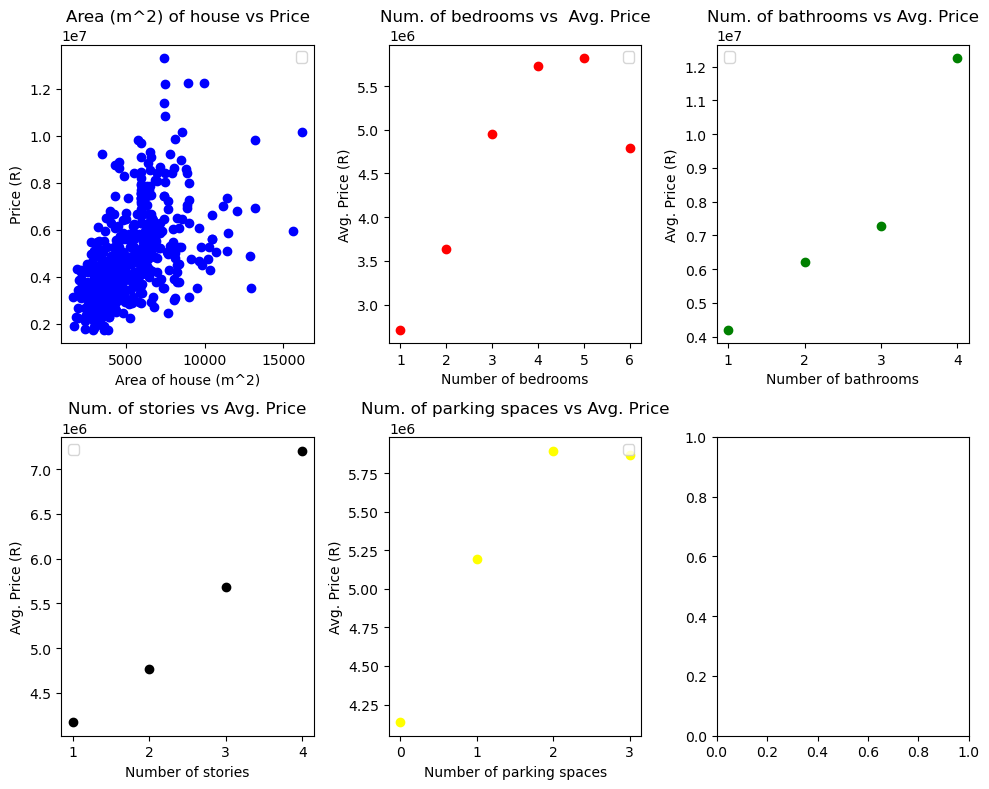

In [58]:
# Testing graphically whether there is a relationship between the dependent variable and various independent variables (i.e. continuos variables)
area = house_data_df['area']
bedrooms = calculate_avg_price(house_data_df,'bedrooms','price')
bathrooms = calculate_avg_price(house_data_df,'bathrooms','price')
stories = calculate_avg_price(house_data_df,'stories','price')
parking = calculate_avg_price(house_data_df,'parking','price')

fig, axes = plt.subplots(2,3 ,figsize=(10,8))

axes[0,0].scatter(area, y, color='blue')
axes[0,0].set_title('Area (m^2) of house vs Price')
axes[0,0].set_xlabel('Area of house (m^2)')
axes[0,0].set_ylabel('Price (R)')
axes[0,0].legend()

axes[0,1].scatter(bedrooms['bedrooms'], bedrooms['average_price'], color='red')
axes[0,1].set_title('Num. of bedrooms vs  Avg. Price')
axes[0,1].set_xlabel('Number of bedrooms')
axes[0,1].set_ylabel('Avg. Price (R)')
axes[0,1].legend()

axes[0,2].scatter(bathrooms['bathrooms'], bathrooms['average_price'], color='green')
axes[0,2].set_title('Num. of bathrooms vs Avg. Price')
axes[0,2].set_xlabel('Number of bathrooms')
axes[0,2].set_ylabel('Avg. Price (R)')
axes[0,2].legend()

axes[1,0].scatter(stories['stories'], stories['average_price'], color='black')
axes[1,0].set_title('Num. of stories vs Avg. Price')
axes[1,0].set_xlabel('Number of stories')
axes[1,0].set_ylabel('Avg. Price (R)')
axes[1,0].legend()

axes[1,1].scatter(parking['parking'], parking['average_price'], color='yellow')
axes[1,1].set_title('Num. of parking spaces vs Avg. Price')
axes[1,1].set_xlabel('Number of parking spaces')
axes[1,1].set_ylabel('Avg. Price (R)')
axes[1,1].legend()

plt.tight_layout()
plt.show()


# Interpreting the scatter plots above

There is a linear relationship between the selected features (area of house, number of bedrooms, number of bathrooms, number of stories, and number of parking spaces) and the target variable (price). Therefore, we can use the data for linear regression.

In [60]:
# Fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [61]:
# Make predictions
y_pred = lr_model.predict(X_test)




In [63]:
# Model Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_}")

Mean Squared Error: 1523019469501.2913
R-squared: 0.6463350878895877
Coefficients: [ 2.53287252e+02  8.08931413e+04  1.11475118e+06  4.17267580e+05
  4.08073682e+05  2.75710533e+05  4.82603522e+05  6.16375423e+05
  6.85839346e+05  3.03111236e+05  5.09192089e+05  1.70947968e+05
  4.92953049e+04 -2.20243273e+05]
Intercept: -75163.73881652486
